In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
COLUMN_NAMES = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
                'sex','capital-gain','capital-loss','hours-per-week','native-country','income'] #column names for dataset

In [3]:
df = pd.read_csv('Ass4-data/Part_2-classification/adult.data', header=None, names=COLUMN_NAMES, delimiter=',', na_values='?') #read dataset and append column names

In [4]:
# df shape

df.shape

(32561, 15)

In [5]:
# top 5 rows in dataset

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#for missing values '?' in df replace with np.nan

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.replace('?', np.nan, inplace=True)

In [7]:
#get value counts for each column

for col in df.columns:
    print(df[col].value_counts())
    print()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

education-num
9     1

In [8]:
# get the summary of the dataset and datatypes of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
totalMissingColumn = df.isnull().sum() #total missing values in dataset

df_length = len(df) #length of dataset
missingValues = (df.isnull().sum()/df_length) * 100 #percentage of missing values in dataset
missingValues = missingValues.sort_values(ascending=False) #sort missing values in descending order
missingValues = missingValues[missingValues > 0] #missing values greater than 0
missingValues = pd.DataFrame(missingValues.values, missingValues.index) #convert to dataframe

print("Missing Values:")
print(totalMissingColumn)
print("\nFeatures with percentage missing:")
print(missingValues)

Missing Values:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Features with percentage missing:
                       0
occupation      5.660146
workclass       5.638647
native-country  1.790486


In [10]:
# print value counts for each column

for col in df.columns:
    print(df[col].value_counts())
    print()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

education-num
9     1

In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
categorical_features = ['education', 'marital-status','workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [13]:
#impute categorical and numerical features to fill missing values

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

# fit imputers

cat_imputer.fit(df[categorical_features])
num_imputer.fit(df[numerical_features])

SimpleImputer(strategy='median')

In [14]:
#transform dataset numerical/categorical features in dataset

df[categorical_features] = cat_imputer.transform(df[categorical_features])
df[numerical_features] = num_imputer.transform(df[numerical_features])

# check for missing values after imputation

totalMissingColumn = df.isnull().sum()
print("\nTRAIN: Total Missing Values per Column after imputation:")
print(totalMissingColumn)


TRAIN: Total Missing Values per Column after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [15]:
# print value counts for each column

for col in df.columns:
    print(df[col].value_counts())
    print()

age
36.0    898
31.0    888
34.0    886
23.0    877
35.0    876
       ... 
83.0      6
88.0      3
85.0      3
86.0      1
87.0      1
Name: count, Length: 73, dtype: int64

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

fnlwgt
164190.0    13
203488.0    13
123011.0    13
148995.0    12
121124.0    12
            ..
232784.0     1
325573.0     1
140176.0     1
318264.0     1
257302.0     1
Name: count, Length: 21648, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name

In [16]:
# get understanding of numerical and categorical features in dataset

n_instances = df.shape[0] #num instances
n_features = df.shape[1] # num features

numerical_int = df.select_dtypes(include='number')  # select num features
categorical_int = df.select_dtypes(include='object') # select cat features

numerical_cnt = numerical_int.shape[1]  # num num features
categorical_cnt = categorical_int.shape[1] # num cat features

print("Num Instances: ", n_instances)
print("Num Features: ", n_features)
print("Num Categorical: ", categorical_cnt)
print("Num Numerical: ", numerical_cnt)

Num Instances:  32561
Num Features:  15
Num Categorical:  9
Num Numerical:  6


In [17]:
print("Numerical Columns:")
print(numerical_int.columns)
print("\nCategorical Columns:")
print(categorical_int.columns)

Numerical Columns:
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Categorical Columns:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


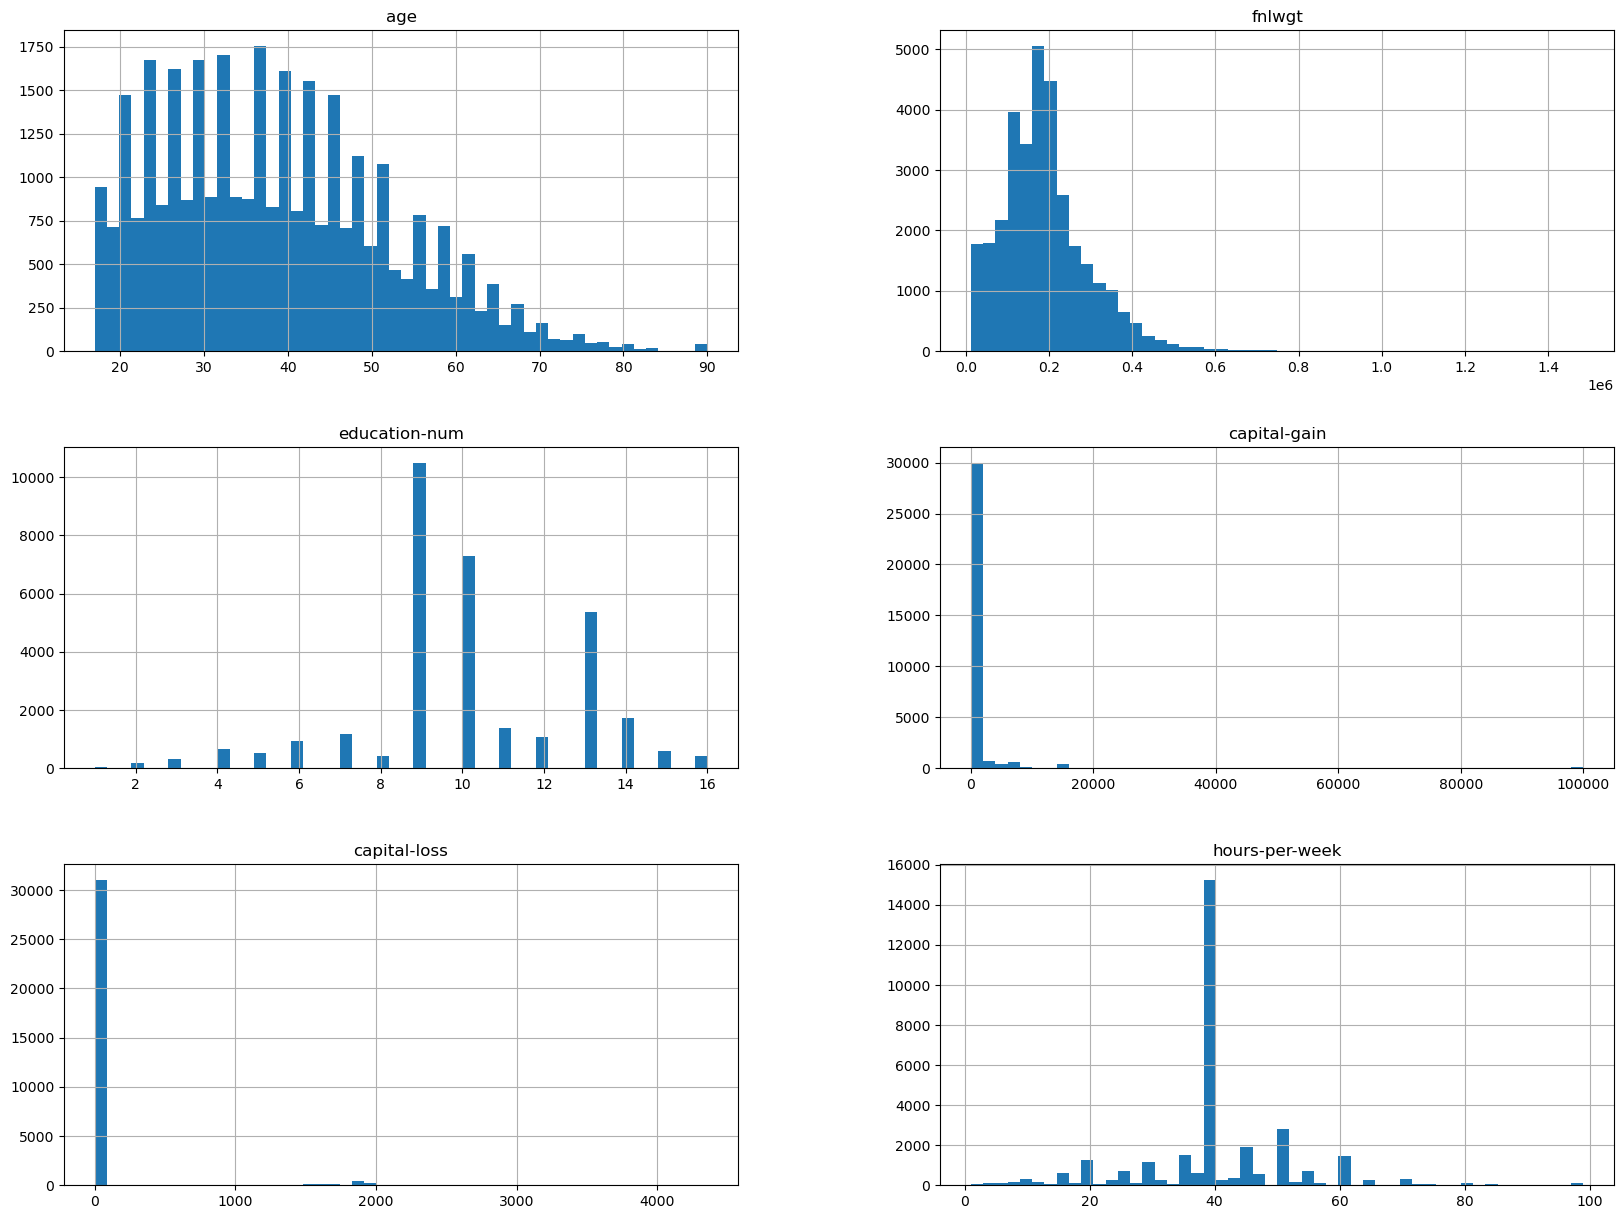

In [18]:
# histograpm of all df features

df.hist(bins=50, figsize=(20,15))
plt.show()

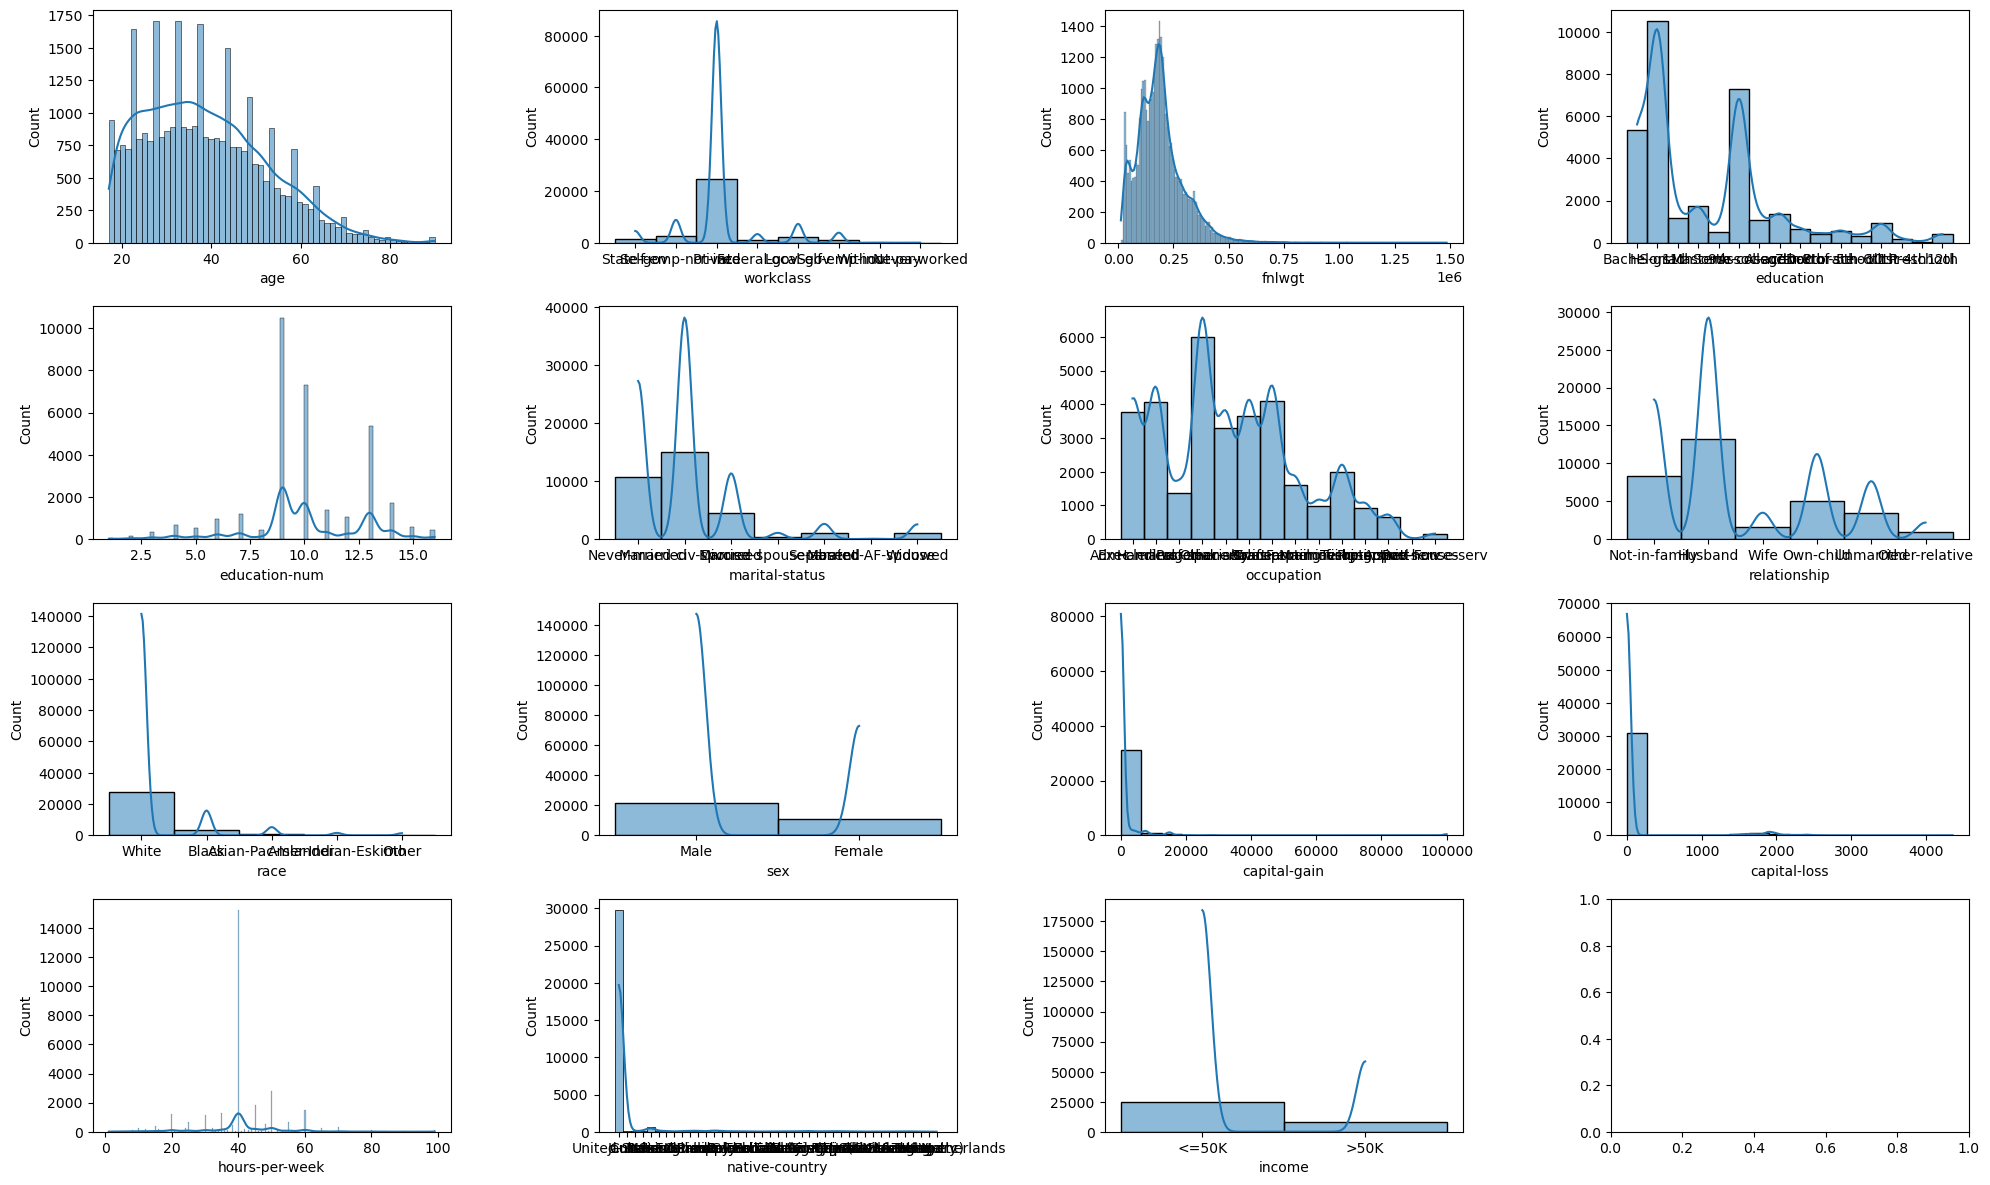

In [19]:
fig, axs = plt.subplots(4, 4, figsize=(20, 12))

for i, feature in enumerate(df.columns):
    row = i // 4 
    col = i % 4
    sns.histplot(df[feature], kde=True, ax=axs[row, col])

plt.tight_layout() 
plt.show()

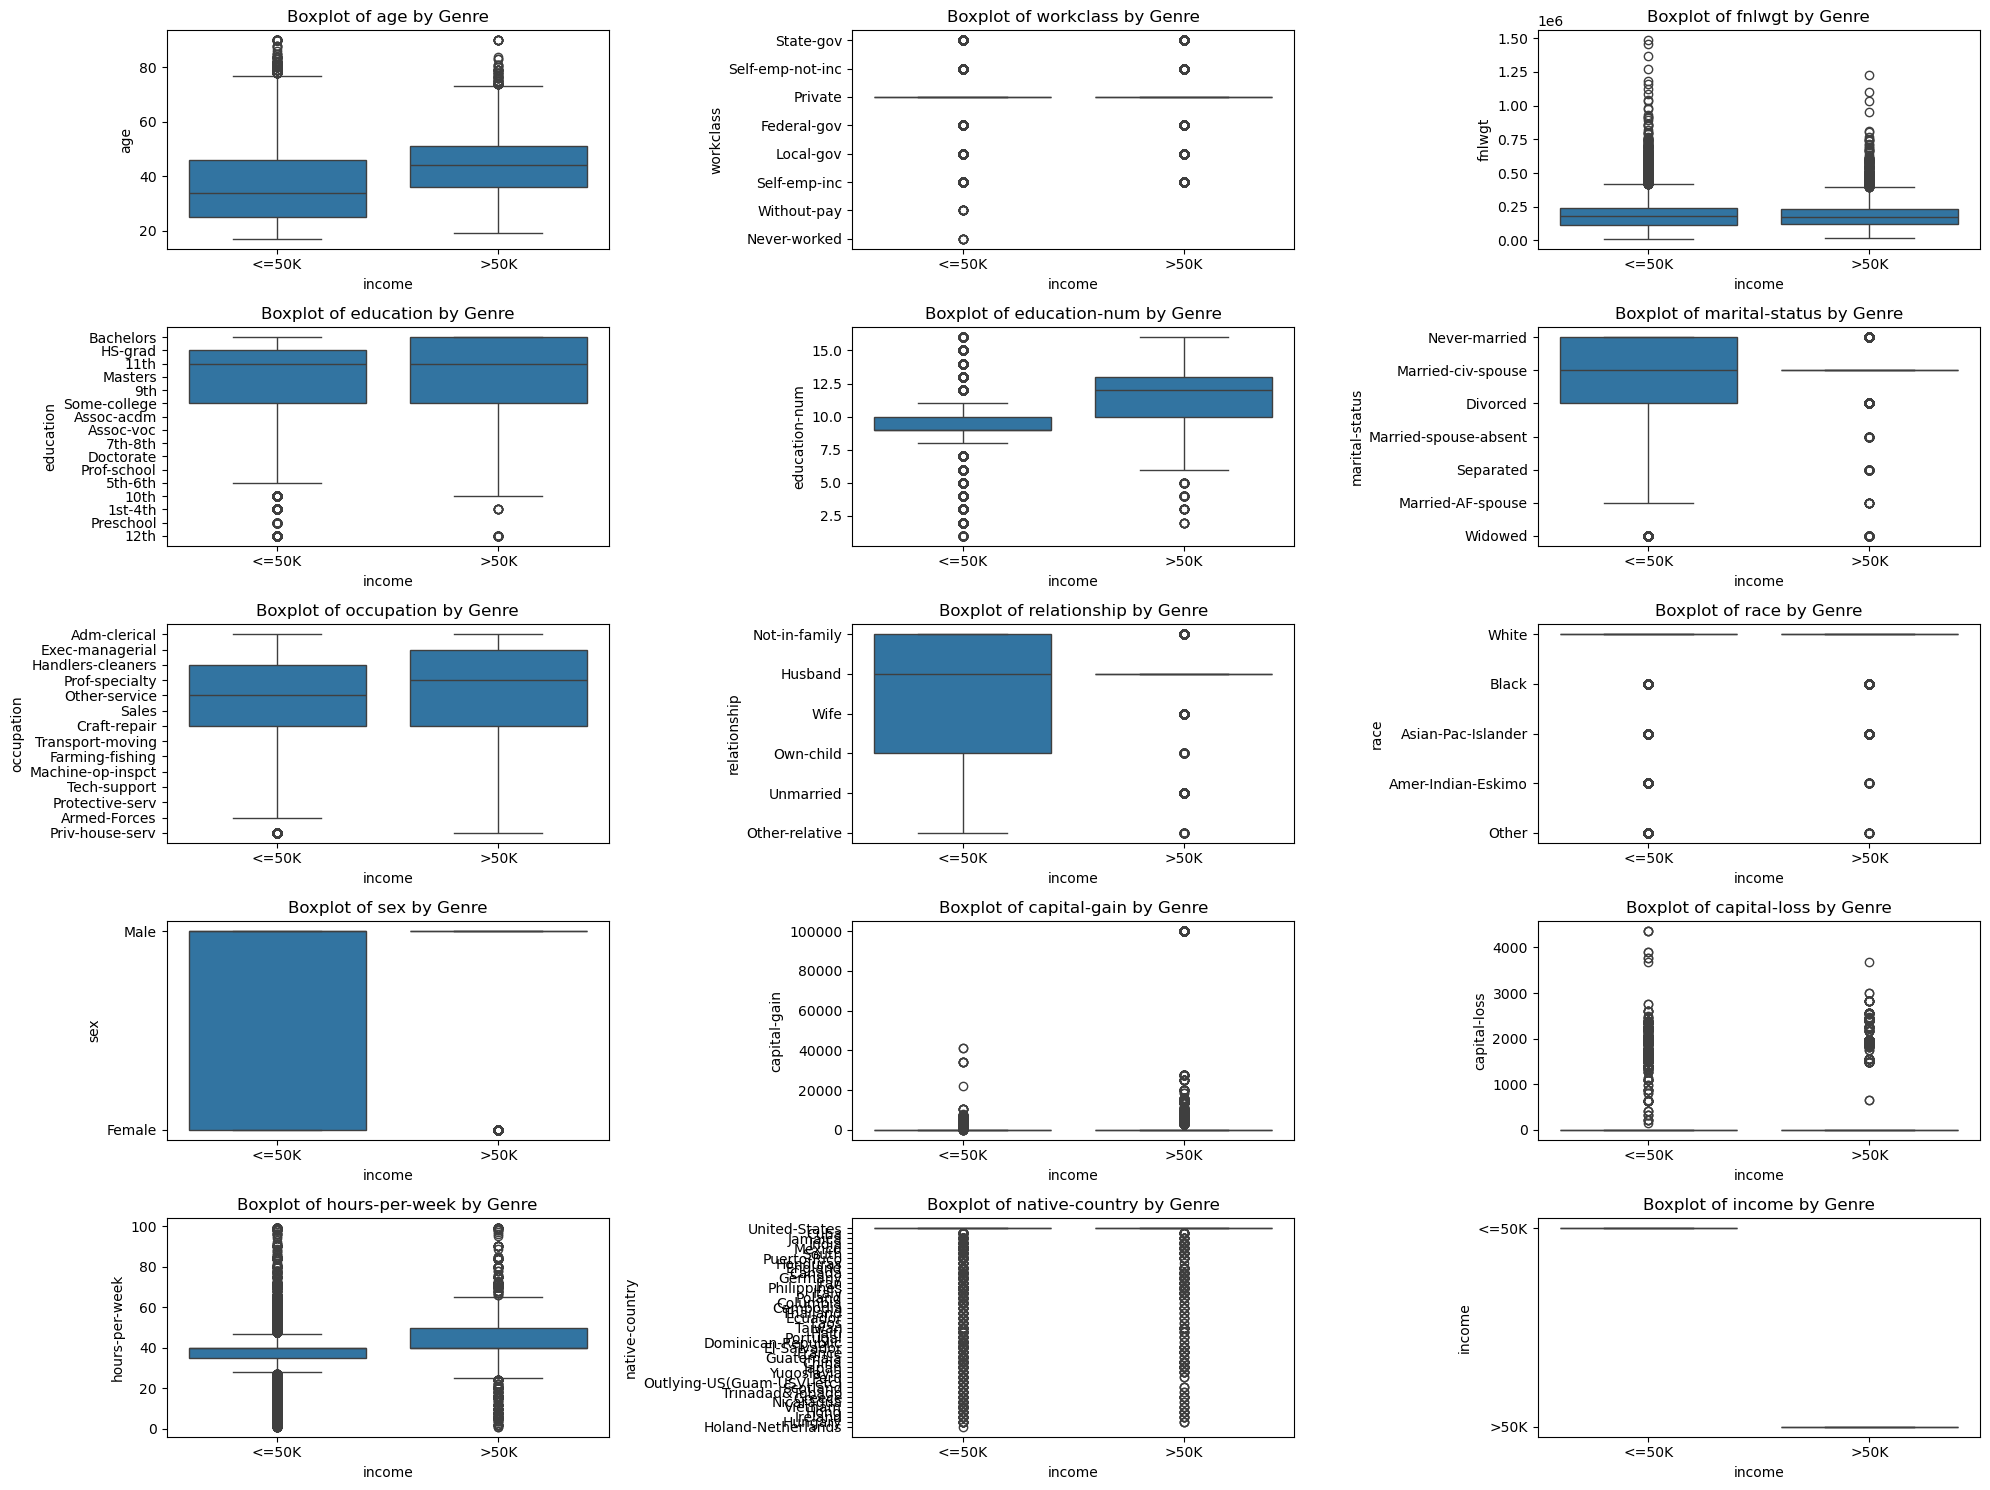

In [20]:
# boxplot of all features in dataset

fig, axs = plt.subplots(5, 3, figsize=(20, 15))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x='income', y=col, data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col} by Genre')
    axs[i].set_xticklabels(axs[i].get_xticklabels())

plt.tight_layout()
plt.show()

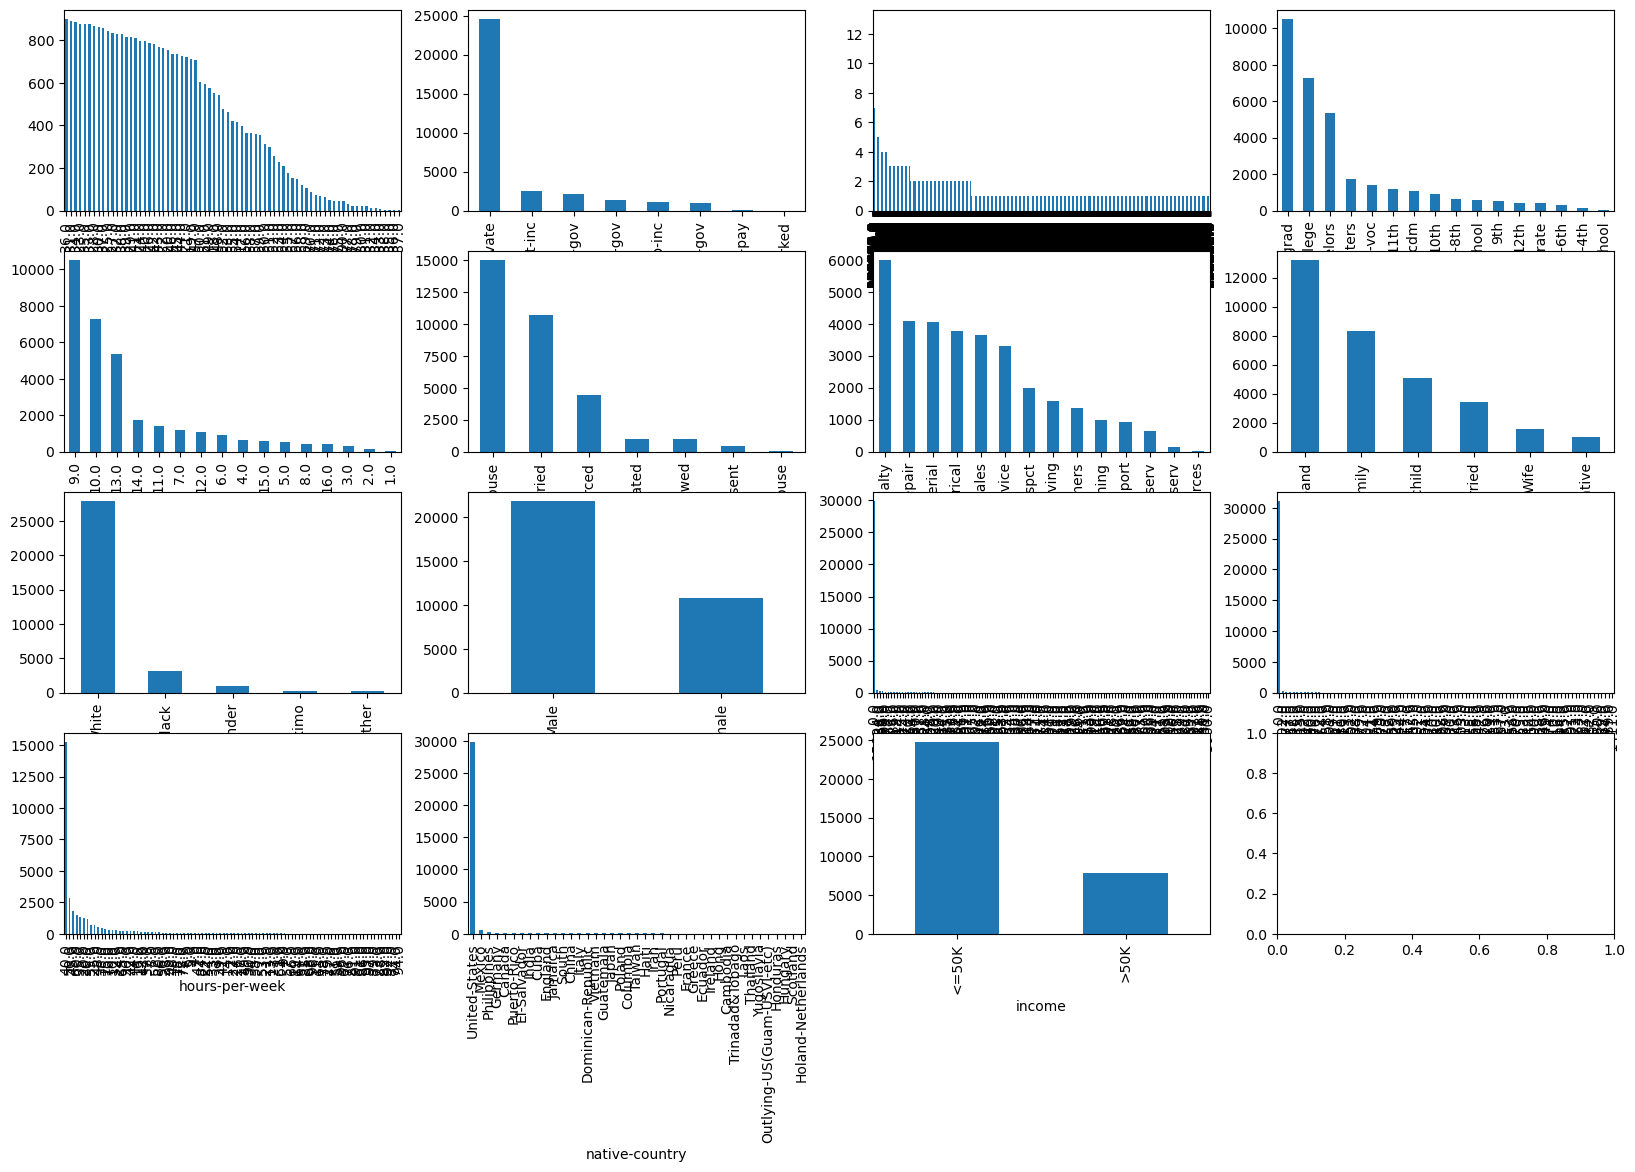

In [21]:
fig, axs = plt.subplots(4, 4, figsize=(20, 12))

for i, feature in enumerate(df.columns):
    row = i // 4
    col = i % 4
    df[feature].value_counts().plot(kind='bar', ax=axs[row, col])

<Axes: xlabel='native-country'>

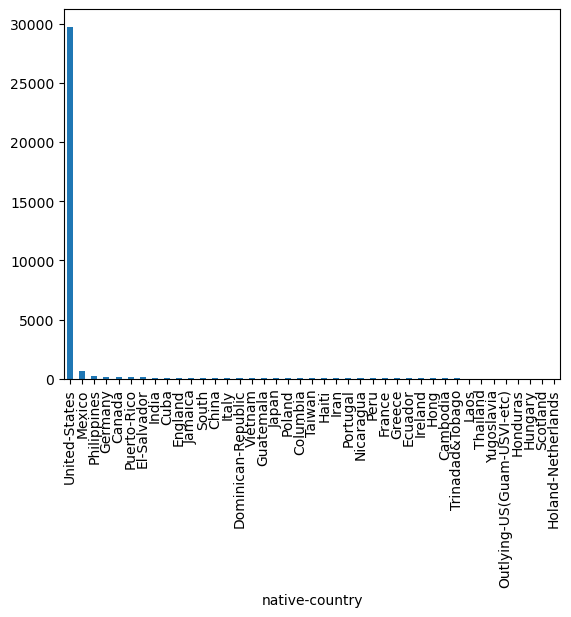

In [22]:
#boxplot of native-country column in dataset

df["native-country"].value_counts().plot.bar()

<Axes: xlabel='native-country'>

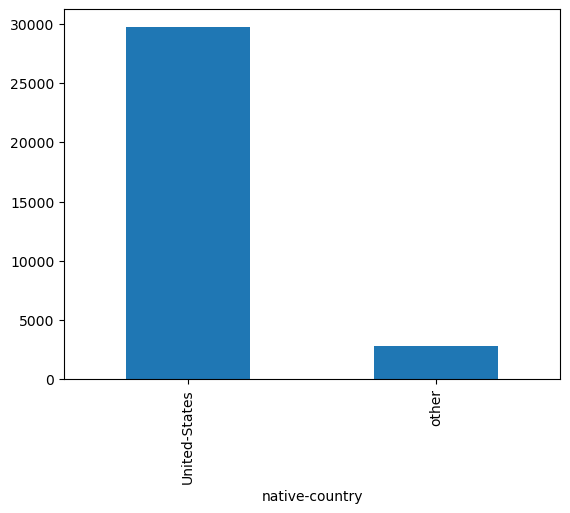

In [23]:
# convert every non-us country to 'other'

for i in df['native-country']:
    if i != 'United-States':
        df['native-country'].replace({i:'other'}, inplace=True)
    
df["native-country"].value_counts().plot.bar()

In [24]:
#map income column to 0 and 1 respective to <=50K and >50K

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

print(df['income'].value_counts())

income
0    24720
1     7841
Name: count, dtype: int64


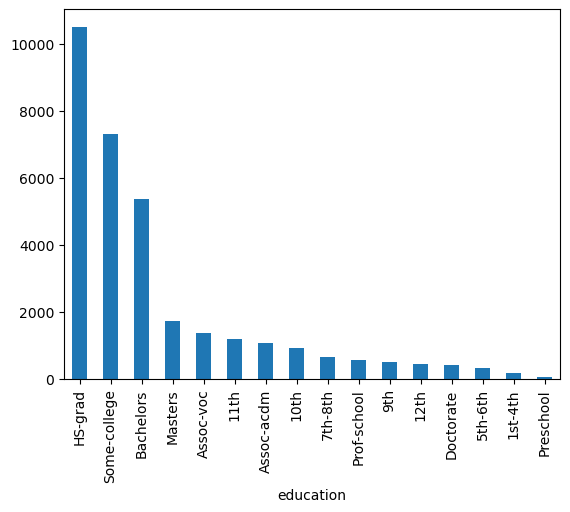

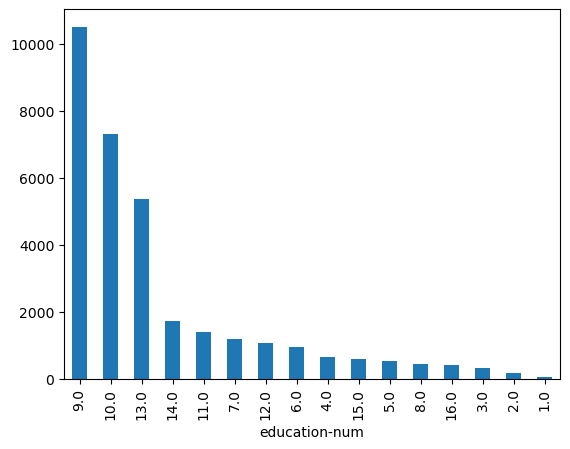

In [25]:
# boxplot for education

education_array = ['education', 'education-num']

for i in education_array:
    df[i].value_counts().plot.bar()
    plt.show()

In [26]:
# drop education column since they are saying the same thing

df.drop('education', axis=1, inplace=True)

In [27]:
#sort ordinal, nominal and numerical lists

ordinal_features = ['education-num']
nominal_features = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country','marital-status']
numerical_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

# initialize encoding models

mms = MinMaxScaler()
ore = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [28]:
#fit encoding models

mms.fit(df[numerical_features])
ore.fit(df[ordinal_features])
ohe.fit(df[nominal_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [29]:
#transofrm numerical, ordinal and nominal features

df[numerical_features] = mms.transform(df[numerical_features])

df[ordinal_features] = ore.transform(df[ordinal_features])

encoded_nominal_features = ohe.transform(df[nominal_features])
encoded_nominal_features = pd.DataFrame(
    encoded_nominal_features, 
    columns=ohe.get_feature_names_out(df[nominal_features].columns),
    index=df.index
)

df = pd.concat([df, encoded_nominal_features], axis=1)
df.drop(nominal_features, axis=1, inplace=True)

print("AFTER PROCESSING")
print(df.head())

AFTER PROCESSING
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.044302           12.0       0.02174           0.0   
1  0.452055  0.048238           12.0       0.00000           0.0   
2  0.287671  0.138113            8.0       0.00000           0.0   
3  0.493151  0.151068            6.0       0.00000           0.0   
4  0.150685  0.221488           12.0       0.00000           0.0   

   hours-per-week  income  workclass_Federal-gov  workclass_Local-gov  \
0        0.397959     0.0                    0.0                  0.0   
1        0.122449     0.0                    0.0                  0.0   
2        0.397959     0.0                    0.0                  0.0   
3        0.397959     0.0                    0.0                  0.0   
4        0.397959     0.0                    0.0                  0.0   

   workclass_Never-worked  ...  sex_Male  native-country_United-States  \
0                     0.0  ...       1.0                     

In [30]:
# print value counts for each column to check encoding worked

for col in df.columns:
    print(df[col].value_counts())
    print()

age
0.260274    898
0.191781    888
0.232877    886
0.082192    877
0.246575    876
           ... 
0.904110      6
0.972603      3
0.931507      3
0.945205      1
0.958904      1
Name: count, Length: 73, dtype: int64

fnlwgt
0.103167    13
0.129856    13
0.075200    13
0.092847    12
0.073918    12
            ..
0.149753     1
0.212771     1
0.086858     1
0.207807     1
0.166404     1
Name: count, Length: 21648, dtype: int64

education-num
8.0     10501
9.0      7291
12.0     5355
13.0     1723
10.0     1382
6.0      1175
11.0     1067
5.0       933
3.0       646
14.0      576
4.0       514
7.0       433
15.0      413
2.0       333
1.0       168
0.0        51
Name: count, dtype: int64

capital-gain
0.000000    29849
0.150242      347
0.076881      284
0.072981      246
1.000000      159
            ...  
0.011110        1
0.025380        1
0.220402        1
0.049310        1
0.050601        1
Name: count, Length: 119, dtype: int64

capital-loss
0.000000    31042
0.436639      202
0.

In [31]:
# printed correlation matrix of df features

corr = df.corr()
corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,sex_Male,native-country_United-States,native-country_other,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037,0.051227,0.060901,-0.019362,...,0.088832,0.017993,-0.017993,0.129975,-0.011896,0.315679,0.016698,-0.534359,0.010210,0.265177
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463,-0.007525,-0.002828,0.005031,...,0.026858,-0.079790,0.079790,-0.014973,-0.000406,-0.026363,0.003634,0.037108,0.028467,-0.026246
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154,0.060518,0.097941,-0.015117,...,0.012280,0.122965,-0.122965,-0.007771,0.000964,0.086078,-0.034223,-0.032109,-0.055152,-0.068044
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329,-0.005768,-0.007007,-0.002140,...,0.048480,0.011299,-0.011299,-0.018798,-0.002322,0.085873,-0.006542,-0.066334,-0.013233,-0.012166
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526,0.010798,0.014668,-0.003177,...,0.045567,0.014458,-0.014458,-0.022396,-0.005760,0.080466,-0.008355,-0.060623,-0.013061,-0.003361
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689,0.013293,0.011576,-0.014262,...,0.229309,0.008217,-0.008217,0.026052,0.001492,0.212817,-0.007089,-0.197936,-0.016587,-0.107122
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000,0.059372,0.033091,-0.008259,...,0.215980,0.038942,-0.038942,-0.126995,0.012061,0.444696,-0.042532,-0.318440,-0.074386,-0.064381
workclass_Federal-gov,0.051227,-0.007525,0.060518,-0.005768,0.010798,0.013293,0.059372,1.000000,-0.045682,-0.002556,...,0.000989,0.016679,-0.016679,0.019573,0.015867,0.010732,-0.002135,-0.027056,-0.004388,0.007099
workclass_Local-gov,0.060901,-0.002828,0.097941,-0.007007,0.014668,0.011576,0.033091,-0.045682,1.000000,-0.003843,...,-0.037966,0.031002,-0.031002,0.030427,-0.006968,0.015164,-0.005416,-0.041793,-0.002070,0.016146
workclass_Never-worked,-0.019362,0.005031,-0.015117,-0.002140,-0.003177,-0.014262,-0.008259,-0.002556,-0.003843,1.000000,...,0.001405,0.004505,-0.004505,0.000274,-0.000390,-0.009329,-0.001672,0.012061,-0.002644,-0.002601


<Axes: >

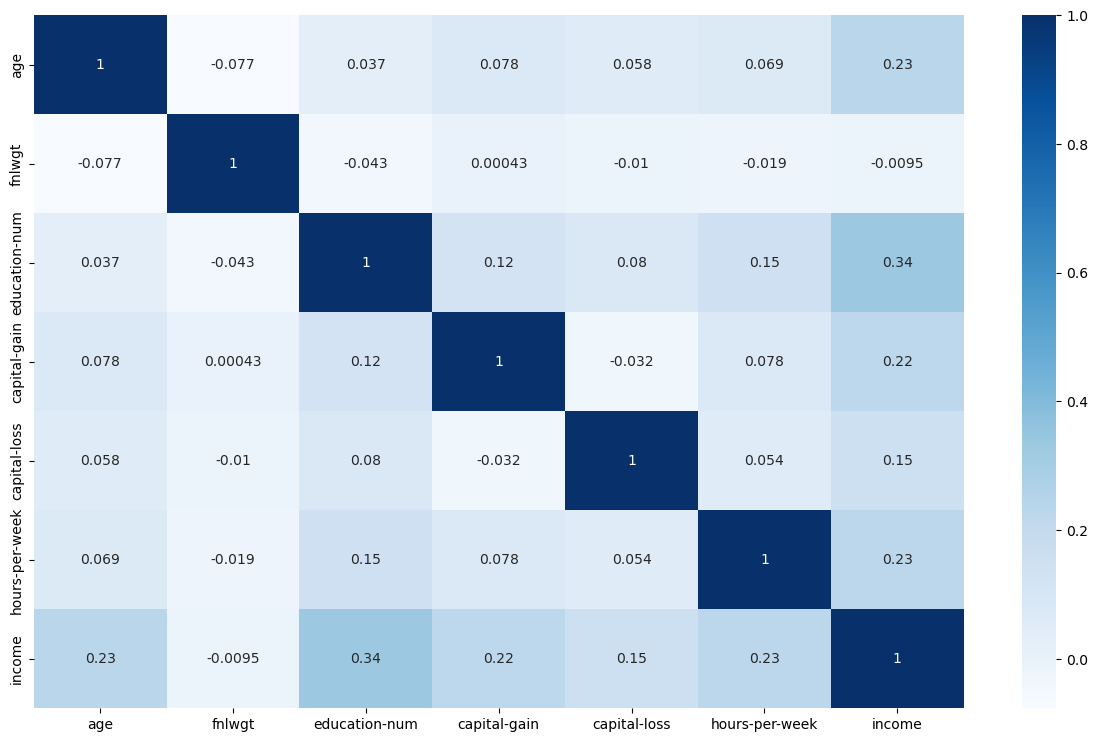

In [32]:
#heatmap correlation matrix of age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week and income columns

default_df = df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']]
fig = plt.figure(figsize = (15,9))
sns.heatmap(default_df.corr(), cmap='Blues', annot = True)

In [33]:
train_data = df.drop(['income'], axis=1) #drop target column from train
test_data = df['income'] #target column

In [34]:
x_train, x_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.3, random_state=309) #70 train 30 test

In [35]:
# shape of train and test dataframes

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (22792, 50)
x_test shape:  (9769, 50)
y_train shape:  (22792,)
y_test shape:  (9769,)


In [36]:
#convert dataframes to array

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [37]:
# KNN Train

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_train_start_time = time.time()
knn_pred = knn.predict(x_test)
knn_train_end_time = time.time()

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_auc = roc_auc_score(y_test, knn_pred)
knn_train_execution_time = knn_train_end_time - knn_train_start_time

In [38]:
# Naive Bayes -> GaussianNB Train

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_train_start_time = time.time()
gnb_pred = gnb.predict(x_test)
gnb_train_end_time = time.time()

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_f1 = f1_score(y_test, gnb_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
gnb_train_execution_time = gnb_train_end_time - gnb_train_start_time

In [39]:
# SVM Train

svm = LinearSVC()
svm.fit(x_train, y_train)
svm_train_start_time = time.time()
svm_pred = svm.predict(x_test)
svm_train_end_time = time.time()

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_auc = roc_auc_score(y_test, svm_pred)
svm_train_execution_time = svm_train_end_time - svm_train_start_time

In [40]:
# Decision Tree Train

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_train_start_time = time.time()
dt_pred = dt.predict(x_test)
dt_train_end_time = time.time()

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred)
dt_train_execution_time = dt_train_end_time - dt_train_start_time

In [41]:
# Random Forest Train

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_train_start_time = time.time()
rf_pred = rf.predict(x_test)
rf_train_end_time = time.time()

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
rf_train_execution_time = rf_train_end_time - rf_train_start_time

In [42]:
# AdaBoost Train

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
ada_train_start_time = time.time()
ada_pred = ada.predict(x_test)
ada_train_end_time = time.time()

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_auc = roc_auc_score(y_test, ada_pred)
ada_train_execution_time = ada_train_end_time - ada_train_start_time

In [43]:
# Gradient Boosting Train

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_train_start_time = time.time()
gbc_pred = gbc.predict(x_test)
gbc_train_end_time = time.time()

gbc_accuracy = accuracy_score(y_test, gbc_pred)
gbc_precision = precision_score(y_test, gbc_pred)
gbc_recall = recall_score(y_test, gbc_pred)
gbc_f1 = f1_score(y_test, gbc_pred)
gbc_auc = roc_auc_score(y_test, gbc_pred)
gbc_train_execution_time = gbc_train_end_time - gbc_train_start_time

In [44]:
# Linear Discriminant Analysis Train

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_train_start_time = time.time()
lda_pred = lda.predict(x_test)
lda_train_end_time = time.time()

lda_accuracy = accuracy_score(y_test, lda_pred)
lda_precision = precision_score(y_test, lda_pred)
lda_recall = recall_score(y_test, lda_pred)
lda_f1 = f1_score(y_test, lda_pred)
lda_auc = roc_auc_score(y_test, lda_pred)
lda_train_execution_time = lda_train_end_time - lda_train_start_time

In [45]:
# Multi-layer perceptron Train

mlpc = MLPClassifier()
mlpc.fit(x_train, y_train)
mlpc_train_start_time = time.time()
mlpc_pred = mlpc.predict(x_test)
mlpc_train_end_time = time.time()

mlpc_accuracy = accuracy_score(y_test, mlpc_pred)
mlpc_precision = precision_score(y_test, mlpc_pred)
mlpc_recall = recall_score(y_test, mlpc_pred)
mlpc_f1 = f1_score(y_test, mlpc_pred)
mlpc_auc = roc_auc_score(y_test, mlpc_pred)
mlpc_train_execution_time = mlpc_train_end_time - mlpc_train_start_time

In [46]:
# Logistic Regression Train

lrc = LogisticRegression()
lrc.fit(x_train, y_train)
lrc_train_start_time = time.time()
lrc_pred = lrc.predict(x_test)
lrc_train_end_time = time.time()

lrc_accuracy = accuracy_score(y_test, lrc_pred)
lrc_precision = precision_score(y_test, lrc_pred)
lrc_recall = recall_score(y_test, lrc_pred)
lrc_f1 = f1_score(y_test, lrc_pred)
lrc_auc = roc_auc_score(y_test, lrc_pred)
lrc_train_execution_time = lrc_train_end_time - lrc_train_start_time

In [47]:
#read test dataset

test_df = pd.read_csv('Ass4-data/Part_2-classification/adult.data', header=None, names=COLUMN_NAMES, delimiter=',', skiprows=1)

In [48]:
#sort read dataset and convert '?' to np.nan

test_df = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_df = test_df.applymap(lambda x: x.rstrip('.') if isinstance(x, str) else x)
test_df.replace('?', np.nan, inplace=True)

In [49]:
test_categorical_features = ['education', 'marital-status','workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
test_numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [50]:
#imput missing values in test dataset using imputation models fitted from earlier

test_df[test_categorical_features] = cat_imputer.transform(test_df[test_categorical_features])
test_df[test_numerical_features] = num_imputer.transform(test_df[test_numerical_features])

#check that missing values have been imputed

totalMissingColumn = test_df.isnull().sum()
print("\nTEST: Total Missing Values per Column after imputation:")
print(totalMissingColumn)


TEST: Total Missing Values per Column after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [51]:
# print value counts for each column

for col in test_df.columns:
    print(test_df[col].value_counts())
    print()

age
36.0    898
31.0    888
34.0    886
23.0    877
35.0    876
       ... 
83.0      6
88.0      3
85.0      3
86.0      1
87.0      1
Name: count, Length: 73, dtype: int64

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

fnlwgt
164190.0    13
203488.0    13
123011.0    13
148995.0    12
126675.0    12
            ..
325573.0     1
140176.0     1
318264.0     1
329205.0     1
257302.0     1
Name: count, Length: 21647, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name

In [52]:
#map income column to 0 and 1 respective to <=50K and >50K

test_df['income'] = test_df['income'].map({'<=50K': 0, '>50K': 1})

print(test_df['income'].value_counts())

income
0    24719
1     7841
Name: count, dtype: int64


In [53]:
# convert every non-us country to 'other'

for i in test_df['native-country']:
    if i != 'United-States':
        test_df['native-country'].replace({i:'other'}, inplace=True)

In [54]:
# drop education column since they are saying the same thing

test_df.drop('education', axis=1, inplace=True)

In [55]:
#transofrm numerical, ordinal and nominal features

test_df[numerical_features] = mms.transform(test_df[numerical_features])

test_df[ordinal_features] = ore.transform(test_df[ordinal_features])

encoded_nominal_features = ohe.transform(test_df[nominal_features])
encoded_nominal_features = pd.DataFrame(
    encoded_nominal_features, 
    columns=ohe.get_feature_names_out(test_df[nominal_features].columns),
    index=test_df.index
)

test_df = pd.concat([test_df, encoded_nominal_features], axis=1)
test_df.drop(nominal_features, axis=1, inplace=True)

print("AFTER PROCESSING")
print(test_df.head())

AFTER PROCESSING
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.452055  0.048238           12.0           0.0           0.0   
1  0.287671  0.138113            8.0           0.0           0.0   
2  0.493151  0.151068            6.0           0.0           0.0   
3  0.150685  0.221488           12.0           0.0           0.0   
4  0.273973  0.184932           13.0           0.0           0.0   

   hours-per-week  income  workclass_Federal-gov  workclass_Local-gov  \
0        0.122449     0.0                    0.0                  0.0   
1        0.397959     0.0                    0.0                  0.0   
2        0.397959     0.0                    0.0                  0.0   
3        0.397959     0.0                    0.0                  0.0   
4        0.397959     0.0                    0.0                  0.0   

   workclass_Never-worked  ...  sex_Male  native-country_United-States  \
0                     0.0  ...       1.0                     

In [56]:
# print value counts for each column to check encoding worked

for col in test_df.columns:
    print(test_df[col].value_counts())
    print()

age
0.260274    898
0.191781    888
0.232877    886
0.082192    877
0.246575    876
           ... 
0.904110      6
0.972603      3
0.931507      3
0.945205      1
0.958904      1
Name: count, Length: 73, dtype: int64

fnlwgt
0.103167    13
0.129856    13
0.075200    13
0.092847    12
0.077688    12
            ..
0.212771     1
0.086858     1
0.207807     1
0.215238     1
0.166404     1
Name: count, Length: 21647, dtype: int64

education-num
8.0     10501
9.0      7291
12.0     5354
13.0     1723
10.0     1382
6.0      1175
11.0     1067
5.0       933
3.0       646
14.0      576
4.0       514
7.0       433
15.0      413
2.0       333
1.0       168
0.0        51
Name: count, dtype: int64

capital-gain
0.000000    29849
0.150242      347
0.076881      284
0.072981      246
1.000000      159
            ...  
0.011110        1
0.025380        1
0.220402        1
0.049310        1
0.050601        1
Name: count, Length: 119, dtype: int64

capital-loss
0.000000    31041
0.436639      202
0.

In [57]:
testing = test_df.drop(['income'], axis=1) #drop target column from test
test_target = test_df['income'] #target column

In [58]:
testing = np.array(testing) #convert to array
test_target = np.array(test_target) #convert to array

In [59]:
# KNN Test

knn_test_start_time = time.time()
knn_test_pred = knn.predict(testing)
knn_test_end_time = time.time()

knn_test_accuracy = accuracy_score(test_target, knn_test_pred)
knn_test_precision = precision_score(test_target, knn_test_pred)
knn_test_recall = recall_score(test_target, knn_test_pred)
knn_test_f1 = f1_score(test_target, knn_test_pred)
knn_test_auc = roc_auc_score(test_target, knn_test_pred)
knn_test_execution_time = knn_test_end_time - knn_test_start_time

In [60]:
# naive bayes -> gaussianNB Test

gnb_test_start_time = time.time()
gnb_test_pred = gnb.predict(testing)
gnb_test_end_time = time.time()

gnb_test_accuracy = accuracy_score(test_target, gnb_test_pred)
gnb_test_precision = precision_score(test_target, gnb_test_pred)
gnb_test_recall = recall_score(test_target, gnb_test_pred)
gnb_test_f1 = f1_score(test_target, gnb_test_pred)
gnb_test_auc = roc_auc_score(test_target, gnb_test_pred)
gnb_test_execution_time = gnb_test_end_time - gnb_test_start_time

In [61]:
# svm Test

svm_test_start_time = time.time()
svm_test_pred = svm.predict(testing)
svm_test_end_time = time.time()

svm_test_accuracy = accuracy_score(test_target, svm_test_pred)
svm_test_precision = precision_score(test_target, svm_test_pred)
svm_test_recall = recall_score(test_target, svm_test_pred)
svm_test_f1 = f1_score(test_target, svm_test_pred)
svm_test_auc = roc_auc_score(test_target, svm_test_pred)
svm_test_execution_time = svm_test_end_time - svm_test_start_time

In [62]:
# decision tree Test

dt_test_start_time = time.time()
dt_test_pred = dt.predict(testing)
dt_test_end_time = time.time()

dt_test_accuracy = accuracy_score(test_target, dt_test_pred)
dt_test_precision = precision_score(test_target, dt_test_pred)
dt_test_recall = recall_score(test_target, dt_test_pred)
dt_test_f1 = f1_score(test_target, dt_test_pred)
dt_test_auc = roc_auc_score(test_target, dt_test_pred)
dt_test_execution_time = dt_test_end_time - dt_test_start_time

In [63]:
# random forest Test

rf_test_start_time = time.time()
rf_test_pred = rf.predict(testing)
rf_test_end_time = time.time()

rf_test_accuracy = accuracy_score(test_target, rf_test_pred)
rf_test_precision = precision_score(test_target, rf_test_pred)
rf_test_recall = recall_score(test_target, rf_test_pred)
rf_test_f1 = f1_score(test_target, rf_test_pred)
rf_test_auc = roc_auc_score(test_target, rf_test_pred)
rf_test_execution_time = rf_test_end_time - rf_test_start_time

In [64]:
# adaboost Test

ada_test_start_time = time.time()
ada_test_pred = ada.predict(testing)
ada_test_end_time = time.time()

ada_test_accuracy = accuracy_score(test_target, ada_test_pred)
ada_test_precision = precision_score(test_target, ada_test_pred)
ada_test_recall = recall_score(test_target, ada_test_pred)
ada_test_f1 = f1_score(test_target, ada_test_pred)
ada_test_auc = roc_auc_score(test_target, ada_test_pred)
ada_test_execution_time = ada_test_end_time - ada_test_start_time

In [65]:
# gradient boosting Test

gbc_test_start_time = time.time()
gbc_test_pred = gbc.predict(testing)
gbc_test_end_time = time.time()

gbc_test_accuracy = accuracy_score(test_target, gbc_test_pred)
gbc_test_precision = precision_score(test_target, gbc_test_pred)
gbc_test_recall = recall_score(test_target, gbc_test_pred)
gbc_test_f1 = f1_score(test_target, gbc_test_pred)
gbc_test_auc = roc_auc_score(test_target, gbc_test_pred)
gbc_test_execution_time = gbc_test_end_time - gbc_test_start_time

In [66]:
# linear discriminant analysis Test

lda_test_start_time = time.time()
lda_test_pred = lda.predict(testing)
lda_test_end_time = time.time()

lda_test_accuracy = accuracy_score(test_target, lda_test_pred)
lda_test_precision = precision_score(test_target, lda_test_pred)
lda_test_recall = recall_score(test_target, lda_test_pred)
lda_test_f1 = f1_score(test_target, lda_test_pred)
lda_test_auc = roc_auc_score(test_target, lda_test_pred)
lda_test_execution_time = lda_test_end_time - lda_test_start_time

In [67]:
# multi-layer perceptron Test

mlpc_test_start_time = time.time()
mlpc_test_pred = mlpc.predict(testing)
mlpc_test_end_time = time.time()

mlpc_test_accuracy = accuracy_score(test_target, mlpc_test_pred)
mlpc_test_precision = precision_score(test_target, mlpc_test_pred)
mlpc_test_recall = recall_score(test_target, mlpc_test_pred)
mlpc_test_f1 = f1_score(test_target, mlpc_test_pred)
mlpc_test_auc = roc_auc_score(test_target, mlpc_test_pred)
mlpc_test_execution_time = mlpc_test_end_time - mlpc_test_start_time

In [68]:
# logistic regression Test

lrc_test_start_time = time.time()
lrc_test_pred = lrc.predict(testing)
lrc_test_end_time = time.time()

lrc_test_accuracy = accuracy_score(test_target, lrc_test_pred)
lrc_test_precision = precision_score(test_target, lrc_test_pred)
lrc_test_recall = recall_score(test_target, lrc_test_pred)
lrc_test_f1 = f1_score(test_target, lrc_test_pred)
lrc_test_auc = roc_auc_score(test_target, lrc_test_pred)
lrc_test_execution_time = lrc_test_end_time - lrc_test_start_time

In [69]:
calculations = ['accuracy', 'precision', 'recall', 'f1', 'auc', 'extime'] #calculation types

train_results = {'knn':[knn_accuracy, knn_precision, knn_recall, knn_f1, knn_auc, knn_train_execution_time],
                 'gnb':[gnb_accuracy, gnb_precision, gnb_recall, gnb_f1, gnb_auc, gnb_train_execution_time],
                 'svm':[svm_accuracy, svm_precision, svm_recall, svm_f1, svm_auc, svm_train_execution_time],
                 'dt':[dt_accuracy, dt_precision, dt_recall, dt_f1, dt_auc, dt_train_execution_time],
                 'rf':[rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc, rf_train_execution_time],
                 'ada':[ada_accuracy, ada_precision, ada_recall, ada_f1, ada_auc, ada_train_execution_time],
                 'gbc':[gbc_accuracy, gbc_precision, gbc_recall, gbc_f1, gbc_auc, gbc_train_execution_time],
                 'lda':[lda_accuracy, lda_precision, lda_recall, lda_f1, lda_auc, lda_train_execution_time],
                 'mlpc':[mlpc_accuracy, mlpc_precision, mlpc_recall, mlpc_f1, mlpc_auc, mlpc_train_execution_time],
                 'lrc':[lrc_accuracy, lrc_precision, lrc_recall, lrc_f1, lrc_auc, lrc_train_execution_time]} #array of train model results

test_results = {'knn':[knn_test_accuracy, knn_test_precision, knn_test_recall, knn_test_f1, knn_test_auc, knn_test_execution_time],
                'gnb':[gnb_test_accuracy, gnb_test_precision, gnb_test_recall, gnb_test_f1, gnb_test_auc, gnb_test_execution_time],
                'svm':[svm_test_accuracy, svm_test_precision, svm_test_recall, svm_test_f1, svm_test_auc, svm_test_execution_time],
                'dt':[dt_test_accuracy, dt_test_precision, dt_test_recall, dt_test_f1, dt_test_auc, dt_test_execution_time],
                'rf':[rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_f1, rf_test_auc, rf_test_execution_time],
                'ada':[ada_test_accuracy, ada_test_precision, ada_test_recall, ada_test_f1, ada_test_auc, ada_test_execution_time],
                'gbc':[gbc_test_accuracy, gbc_test_precision, gbc_test_recall, gbc_test_f1, gbc_test_auc, gbc_test_execution_time],
                'lda':[lda_test_accuracy, lda_test_precision, lda_test_recall, lda_test_f1, lda_test_auc, lda_test_execution_time],
                'mlpc':[mlpc_test_accuracy, mlpc_test_precision, mlpc_test_recall, mlpc_test_f1, mlpc_test_auc, mlpc_test_execution_time],
                'lrc':[lrc_test_accuracy, lrc_test_precision, lrc_test_recall, lrc_test_f1, lrc_test_auc, lrc_test_execution_time]} #array of test model results

In [70]:
training_results = pd.DataFrame(train_results, index=calculations).T.round(2) #convert to dataframe and round results to 2dp
training_results #print training results

,accuracy,precision,recall,f1,auc,extime
knn,0.83,0.66,0.58,0.62,0.74,0.58
gnb,0.61,0.38,0.95,0.54,0.73,0.00
svm,0.85,0.75,0.58,0.65,0.76,0.00
dt,0.82,0.62,0.63,0.63,0.76,0.00
rf,0.86,0.75,0.62,0.68,0.78,0.11
ada,0.86,0.77,0.60,0.68,0.77,0.03
gbc,0.87,0.80,0.59,0.68,0.77,0.01
lda,0.84,0.71,0.57,0.63,0.75,0.00
mlpc,0.85,0.75,0.59,0.66,0.76,0.01
lrc,0.85,0.74,0.58,0.65,0.76,0.00


In [71]:
testing_results = pd.DataFrame(test_results, index=calculations).T.round(2) #convert to dataframe and round results to 2dp
testing_results #print testing results

,accuracy,precision,recall,f1,auc,extime
knn,0.86,0.74,0.65,0.69,0.79,1.41
gnb,0.61,0.38,0.95,0.54,0.73,0.01
svm,0.85,0.74,0.58,0.65,0.76,0.00
dt,0.95,0.88,0.89,0.89,0.93,0.00
rf,0.96,0.94,0.89,0.91,0.93,0.35
ada,0.86,0.77,0.61,0.68,0.77,0.10
gbc,0.87,0.80,0.60,0.69,0.78,0.03
lda,0.84,0.71,0.57,0.63,0.75,0.00
mlpc,0.86,0.77,0.61,0.68,0.78,0.03
lrc,0.85,0.73,0.59,0.65,0.76,0.00
